In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

col_names = ['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
            'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
wdbc = pd.read_csv('wdbc.data', sep = ',', names = col_names)

In [5]:
# separate X and y data
diagnosis = wdbc['Diagnosis']
wdbc_x = wdbc.drop('Diagnosis', axis = 1)

# split into testing and training data
features_train,features_test,labels_train,labels_test = train_test_split(wdbc_x, diagnosis,test_size = 0.2)

In [6]:
# train the decision tree classifier
clf = tree.DecisionTreeClassifier(min_samples_split = 10)
clf.fit(features_train,labels_train)

# run the classifier on the test data
pred = clf.predict(features_test)

# calculate the accuracy
print("Accuracy =", accuracy_score(pred, labels_test)*100, "%")

Accuracy = 92.98245614035088 %


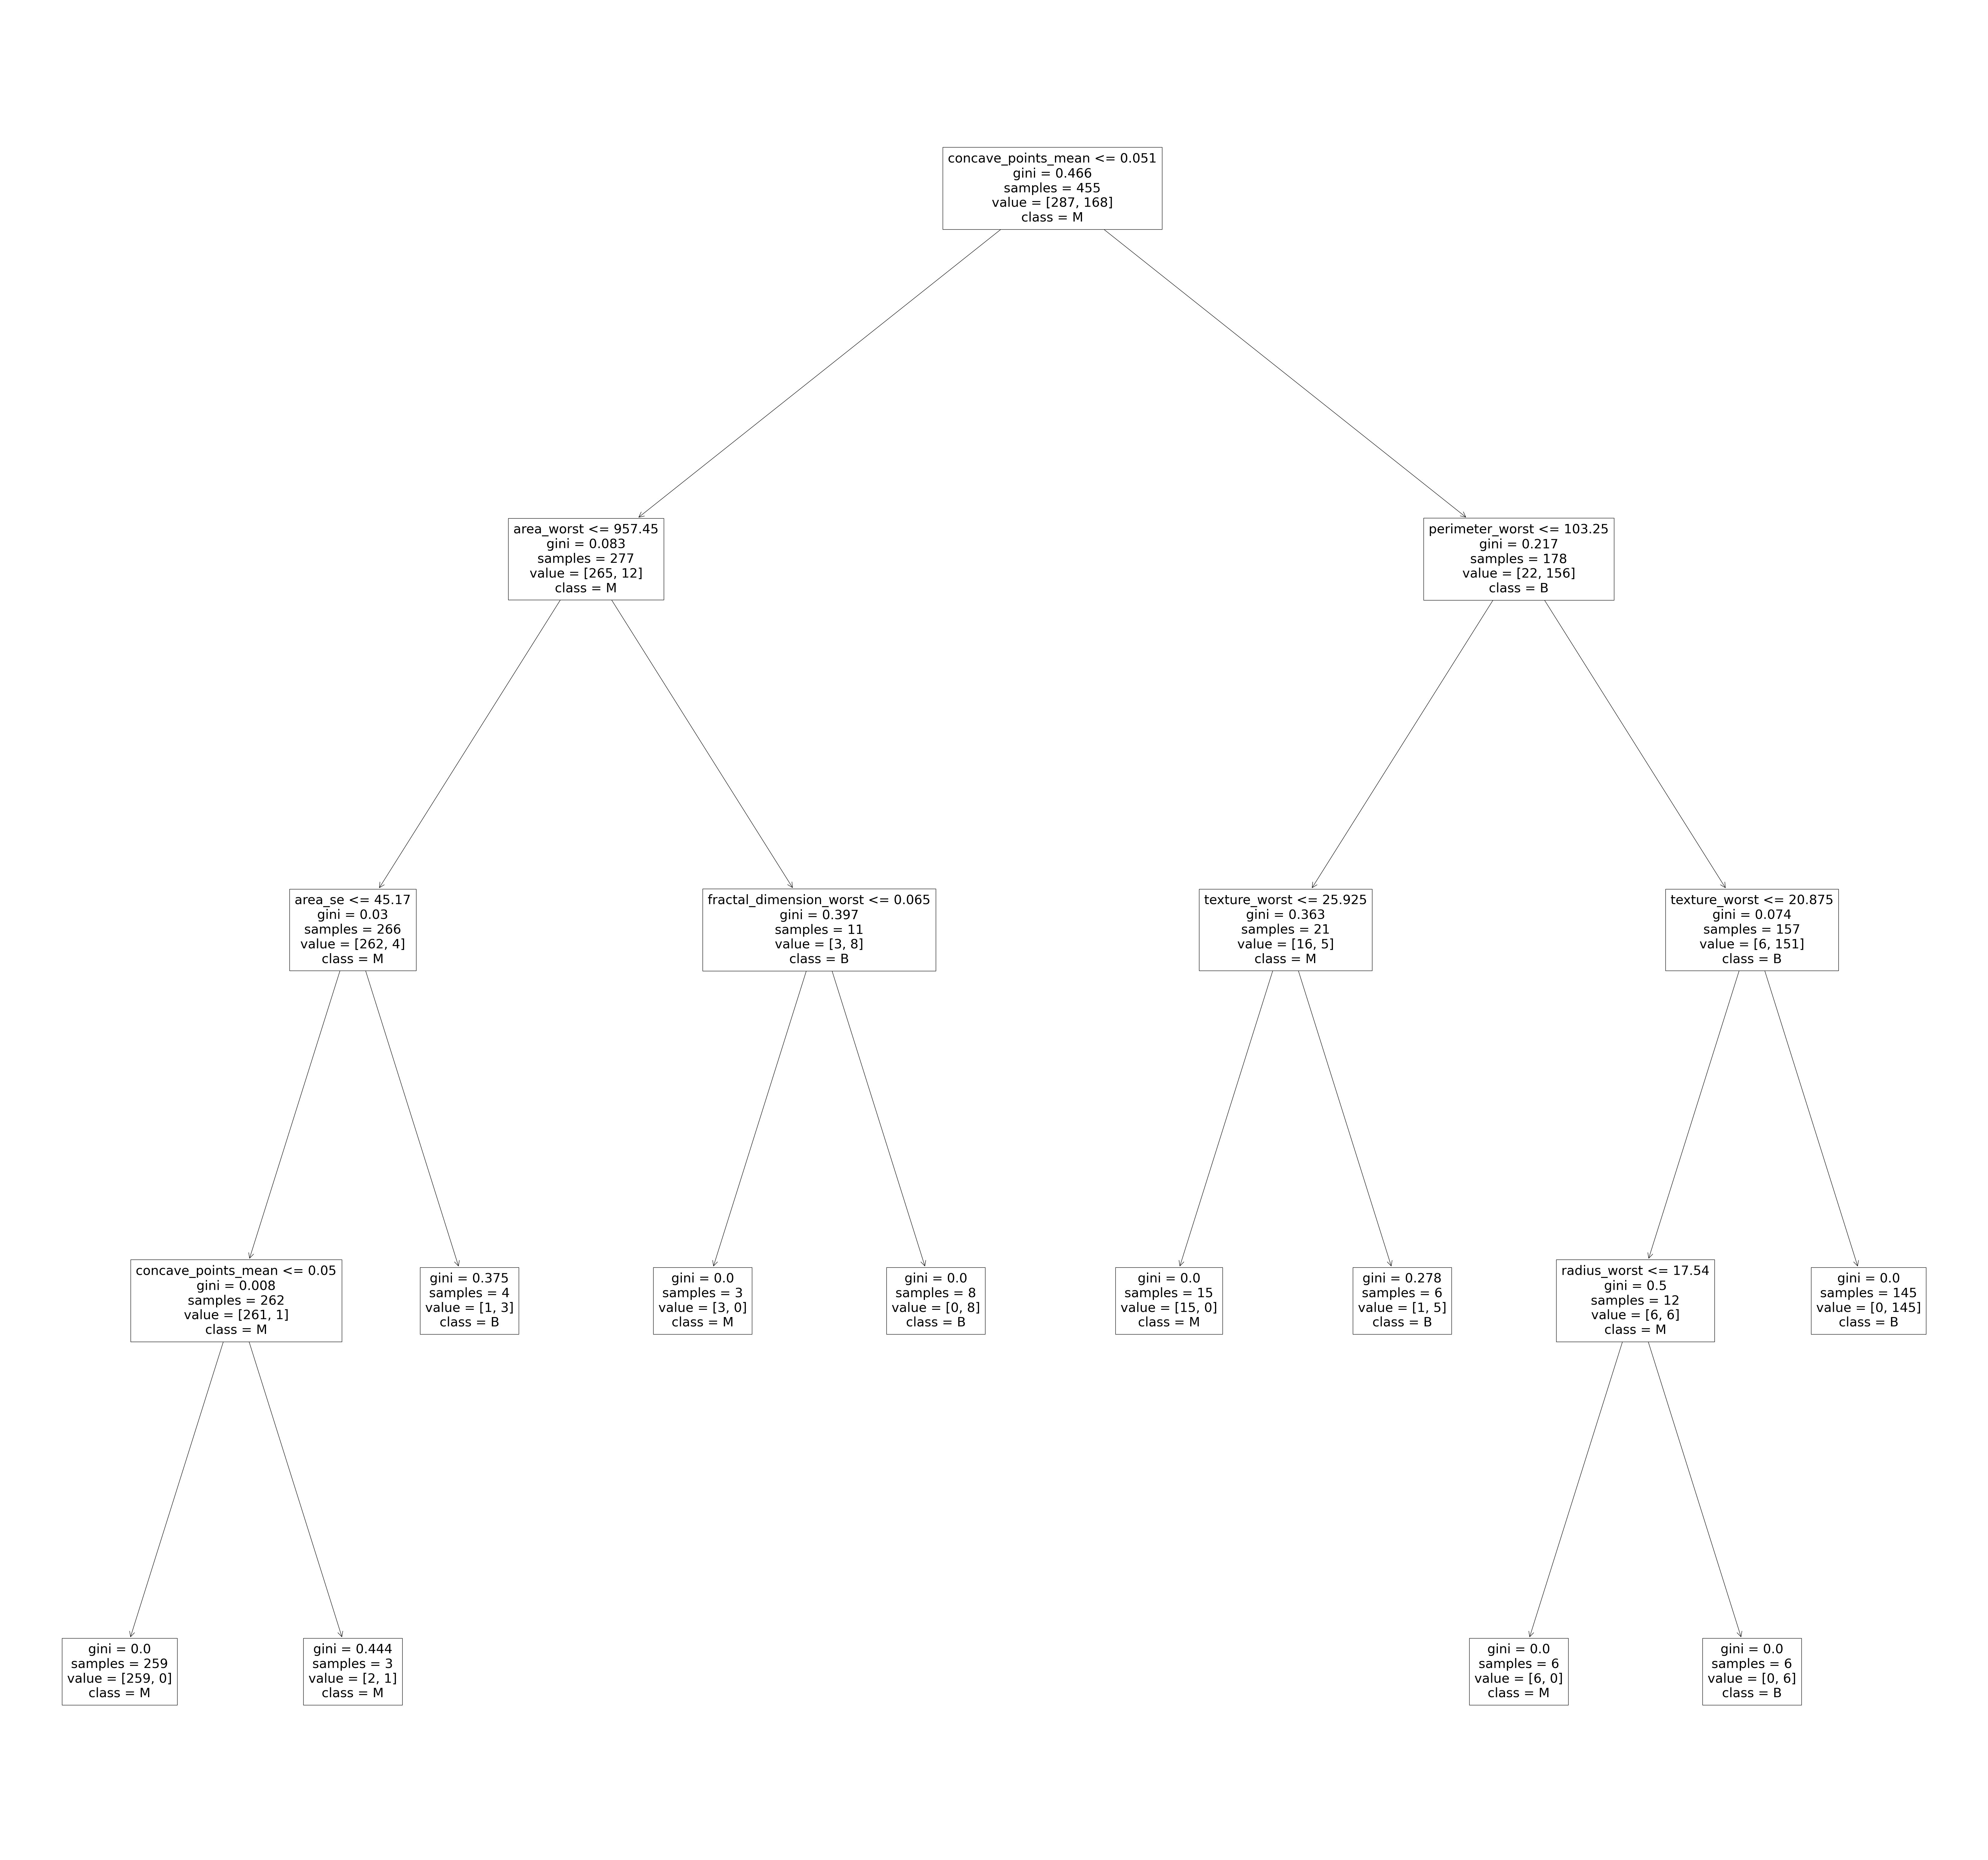

In [10]:
# plot tree
fig = plt.figure(figsize=(85,80))
_ = tree.plot_tree(clf, feature_names = ['ID', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
            'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
                   class_names = ['M', 'B'])

In [13]:
# prune tree
parameters = {"max_leaf_nodes": list(range(2, 100))}

# create the grid and fit to training data
grid = GridSearchCV(clf, param_grid = parameters,
                    cv = 10, verbose = 1, n_jobs = -1)
grid.fit(features_train, labels_train)
grid.best_estimator_

Fitting 10 folds for each of 98 candidates, totalling 980 fits


DecisionTreeClassifier(max_leaf_nodes=45, min_samples_split=10)

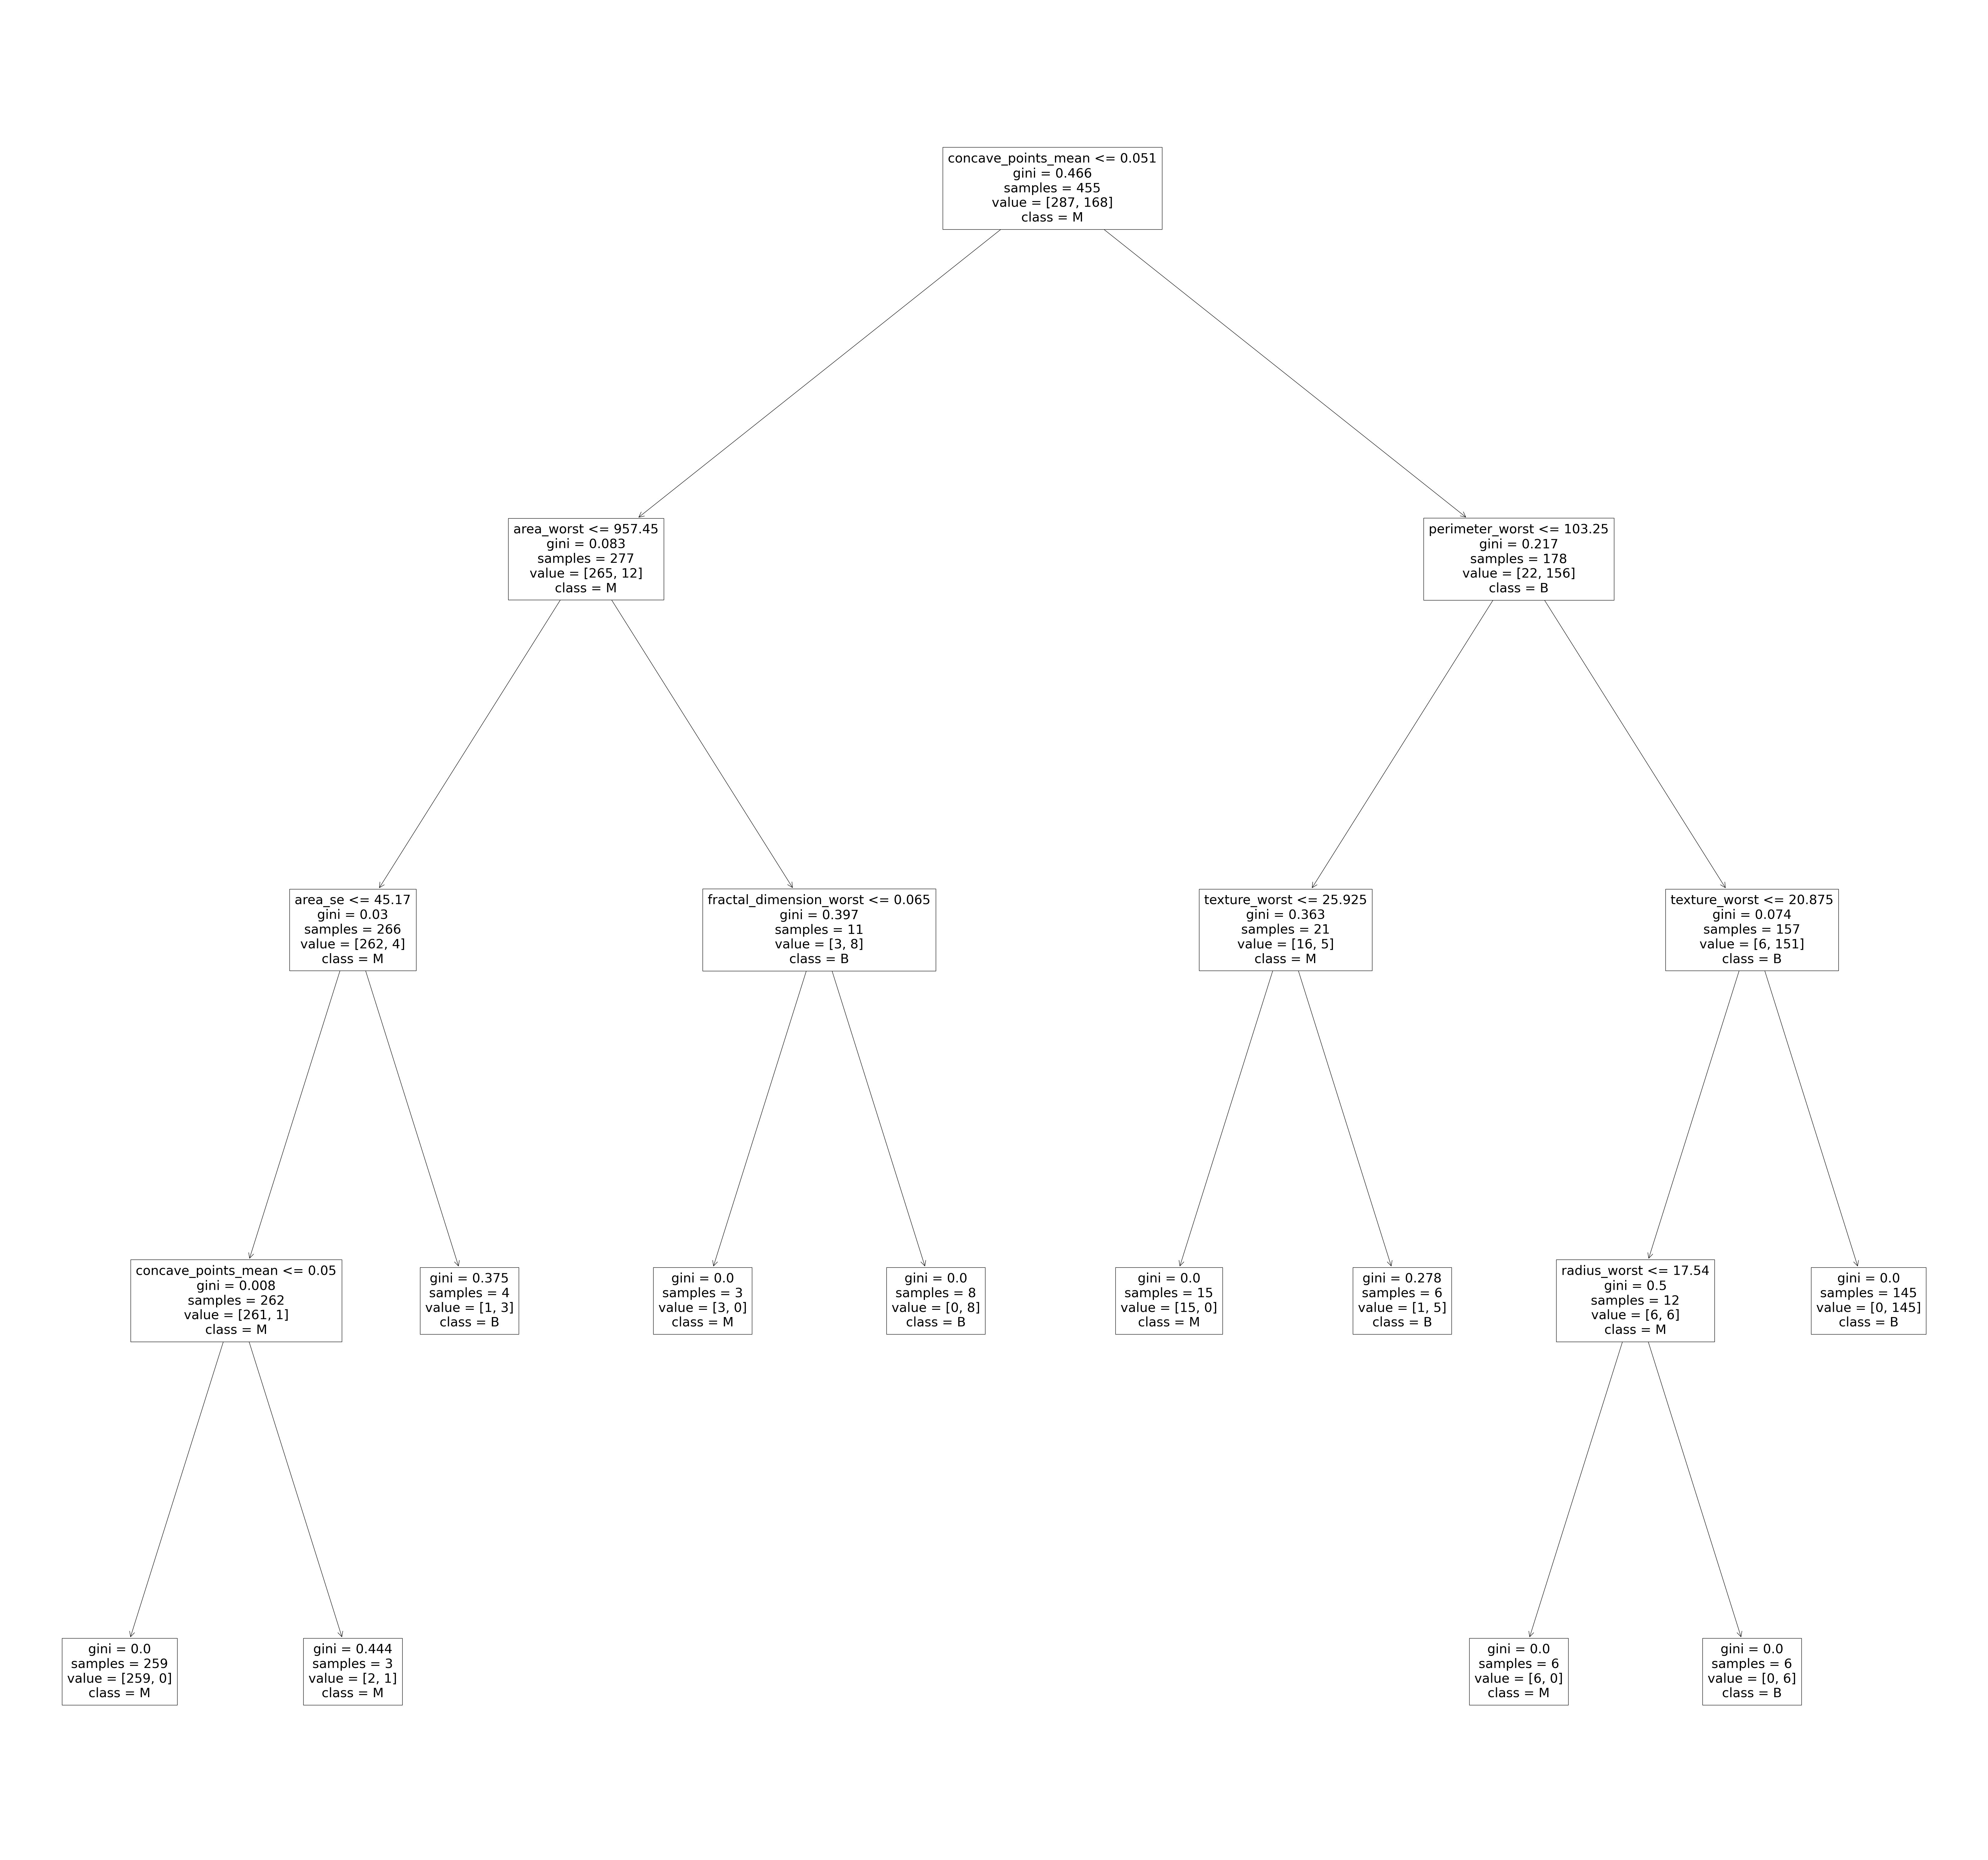

In [17]:
# plot the pruned tree
pruned = tree.DecisionTreeClassifier(max_leaf_nodes = 12, min_samples_split = 10)
pruned.fit(features_train, labels_train)
fig = plt.figure(figsize=(85,80))
_ = tree.plot_tree(pruned, feature_names = ['ID', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
            'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
                   class_names = ['M', 'B'])

In [18]:
# check accuracy
pred = pruned.predict(features_test)

print("Accuracy =", accuracy_score(pred, labels_test)*100, "%")

Accuracy = 92.98245614035088 %
